In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import zipfile, os
import numpy as np
import shutil
import random

In [20]:
tf.__version__

'2.15.0'

In [21]:
base_dir = 'Dataset/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [22]:
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(validation_dir):
    os.makedirs(validation_dir)

In [24]:
random.seed(42)

for class_dir in ['paper', 'scissors', 'rock']:
    class_path = os.path.join(base_dir, class_dir)
    images = os.listdir(class_path)
    random.shuffle(images)

    num_train = int(np.ceil(len(images) * 0.6))
    num_val = len(images) - num_train

    train_class_dir = os.path.join(train_dir, class_dir)
    if not os.path.exists(train_class_dir):
        os.makedirs(train_class_dir)
    val_class_dir = os.path.join(validation_dir, class_dir)
    if not os.path.exists(val_class_dir):
        os.makedirs(val_class_dir)

    for i in range(num_train):
        shutil.move(os.path.join(class_path, images[i]), train_class_dir)
    for i in range(num_train, len(images)):
        shutil.move(os.path.join(class_path, images[i]), val_class_dir)

In [25]:
def find_size(dataset):
  sum_ = 0
  for i in ['paper', 'rock', 'scissors']:
    sum_ += len(os.listdir(f'Dataset/rockpaperscissors/{dataset}/{i}'))
  return sum_

In [26]:
print(find_size('train'))
print(find_size('val'))

1314
874


In [27]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(224,224),
                    batch_size=32,
                    class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(224, 224),
                    batch_size=32,
                    class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


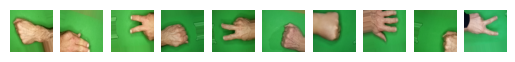

In [29]:
NUMBER_OF_DATA = 10
images, labels = next(train_generator)
print(labels[:NUMBER_OF_DATA])
for i in range(NUMBER_OF_DATA):
    plt.subplot(1, NUMBER_OF_DATA, i+1)
    plt.imshow(images[i])
    plt.axis('off')

plt.show()

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 186624)            0         
                                                                 
 dense_3 (Dense)             (None, 256)              

In [32]:
early_stopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)
checkpoint = ModelCheckpoint(filepath='Model/model_final.keras', monitor='val_accuracy', save_best_only=True, mode='max', save_weights_only=False, verbose=1)

In [33]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [34]:
model.fit(
      train_generator,
      batch_size=64,
      epochs=10,
      validation_data=validation_generator,
      callbacks=[checkpoint, early_stopping]
      )

Epoch 1/10
42/42 [==============================] - ETA: 0s - loss: 1.2619 - accuracy: 0.4193
Epoch 1: val_accuracy improved from -inf to 0.52746, saving model to Model\model_final.keras
42/42 [==============================] - 50s 1s/step - loss: 1.2619 - accuracy: 0.4193 - val_loss: 0.9380 - val_accuracy: 0.5275
Epoch 2/10
42/42 [==============================] - ETA: 0s - loss: 0.9180 - accuracy: 0.5495
Epoch 2: val_accuracy improved from 0.52746 to 0.72082, saving model to Model\model_final.keras
42/42 [==============================] - 51s 1s/step - loss: 0.9180 - accuracy: 0.5495 - val_loss: 0.6162 - val_accuracy: 0.7208
Epoch 3/10
42/42 [==============================] - ETA: 0s - loss: 0.8538 - accuracy: 0.6492
Epoch 3: val_accuracy improved from 0.72082 to 0.73570, saving model to Model\model_final.keras
42/42 [==============================] - 49s 1s/step - loss: 0.8538 - accuracy: 0.6492 - val_loss: 0.5935 - val_accuracy: 0.7357
Epoch 4/10
42/42 [============================